# 因果デジタルツイン

このノートブックではDirectLiNGAMモデルによる因果デジタルツインを検証する。

In [1]:
import numpy as np
import pandas as pd
from scipy.special import expit

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, precision_score, recall_score

from cdt.metrics import SHD

import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from lingam.utils import make_dot as _make_dot
def make_dot(dag, labels=None):
    return _make_dot(dag, lower_limit=0, labels=labels)

from common import CausalDigitalTwin, generate_test_data, discretize, draw_hist, make_tables, draw_pred_hist

np.random.seed(0)

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


## 因果デジタルツインのクラス

## 1. データ生成

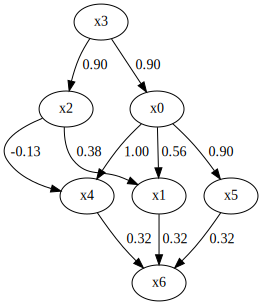

In [2]:
# 元の隣接行列は次と同じ：https://github.com/cdt15/lingam/blob/master/examples/DirectLiNGAM.ipynb

# 係数調整前の隣接行列
cg_not_adjusted = np.array([
    [0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0],
    [3.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [8.0, 0.0,-1.0, 0.0, 0.0, 0.0, 0.0],
    [4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0],
])
# 因果順序
causal_order = [3, 0, 2, 1, 4, 5, 6]
# 各変数の分散に占める誤差項の分散の比率
ratio_list = [0.2, 0.2, 0.2, 1.0, 0.2, 0.2, 0.2]
# シンク変数のインデックス
sink_index = 6

# 係数の調整
X, causal_graph_true, e_true = generate_test_data(cg_not_adjusted, causal_order, ratio_list, size=1000)

display(make_dot(causal_graph_true))

# データ生成関数
def data_gen_direct_lingam(causal_graph, error):
    X = (np.linalg.pinv(np.eye(len(causal_graph)) - causal_graph) @ error.T).T
    return X, error

## 2. 実験

---- remove ----
continuous: SHD= 0.0


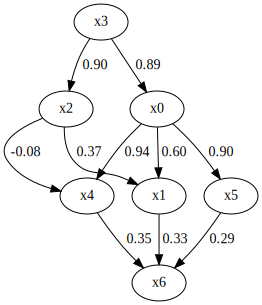

*run
before LinearRegression parent= [0 1 2 3 4 5] , coef= [ 0.0008891   0.32908891 -0.01945124  0.03030099  0.34527709  0.28218827]
simulation LinearRegression parent= [0 1 2 3 4 5] , coef= [-0.00432581  0.32908891 -0.01970929  0.01233469  0.34527709  0.28218827]
before_after LinearRegression parent= [0 1 2 3 4 5] , coef= [ 0.0008891   0.32908891 -0.01945124  0.03030099  0.34527709  0.28218827]
*run shuffle
before LinearRegression parent= [0 1 2 3 4 5] , coef= [ 0.0008891   0.32908891 -0.01945124  0.03030099  0.34527709  0.28218827]
simulation LinearRegression parent= [0 1 2 3 4 5] , coef= [-0.00432581  0.32908891 -0.01970929  0.01233469  0.34527709  0.28218827]
before_after LinearRegression parent= [0 1 2 3 4 5] , coef= [ 0.0008891   0.32908891 -0.01945124  0.03030099  0.34527709  0.28218827]
discrete: SHD= 1.0


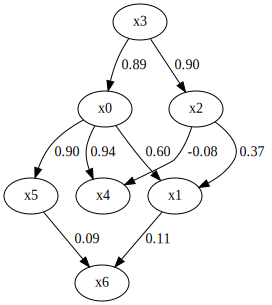

*run
before LogisticRegression parent= [0 1 2 3 4 5] , coef= [[-0.3296215   0.53998137 -0.21579373  0.24022928  0.31321068  0.41834052]]
simulation LogisticRegression parent= [0 1 2 3 4 5] , coef= [[ 0.70731372  5.88098258  0.37649182  0.12654969 -0.04190553  4.83742024]]
before_after LogisticRegression parent= [0 1 2 3 4 5] , coef= [[-0.3296215   0.53998137 -0.21579373  0.24022928  0.31321068  0.41834052]]
*run shuffle
before LogisticRegression parent= [0 1 2 3 4 5] , coef= [[-0.3296215   0.53998137 -0.21579373  0.24022928  0.31321068  0.41834052]]
simulation LogisticRegression parent= [0 1 2 3 4 5] , coef= [[ 0.70731372  5.88098258  0.37649182  0.12654969 -0.04190553  4.83742024]]
before_after LogisticRegression parent= [0 1 2 3 4 5] , coef= [[-0.3296215   0.53998137 -0.21579373  0.24022928  0.31321068  0.41834052]]
---- add ----
continuous: SHD= 0.0


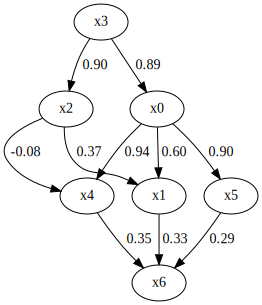

*run
before LinearRegression parent= [0 1 2 3 4 5] , coef= [ 0.0008891   0.32908891 -0.01945124  0.03030099  0.34527709  0.28218827]
simulation LinearRegression parent= [0 1 2 3 4 5] , coef= [ 0.02125976  0.32908891 -0.01970929  0.03595222  0.34527709  0.28218827]
before_after LinearRegression parent= [0 1 2 3 4 5] , coef= [ 0.0008891   0.32908891 -0.01945124  0.03030099  0.34527709  0.28218827]
*run shuffle
before LinearRegression parent= [0 1 2 3 4 5] , coef= [ 0.0008891   0.32908891 -0.01945124  0.03030099  0.34527709  0.28218827]
simulation LinearRegression parent= [0 1 2 3 4 5] , coef= [ 0.02125976  0.32908891 -0.01970929  0.03595222  0.34527709  0.28218827]
before_after LinearRegression parent= [0 1 2 3 4 5] , coef= [ 0.0008891   0.32908891 -0.01945124  0.03030099  0.34527709  0.28218827]
discrete: SHD= 2.0


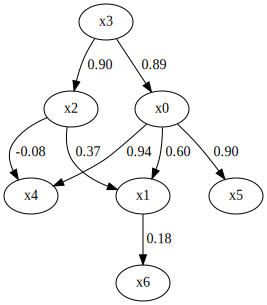

*run
before LogisticRegression parent= [0 1 2 3 4 5] , coef= [[ 0.21240449  0.61924376 -0.06034419  0.0016035   0.12023502 -0.05920672]]
simulation LogisticRegression parent= [0 1 2 3 4 5] , coef= [[0.74852337 6.87524009 0.02341235 0.09053566 0.05925439 0.14067904]]
before_after LogisticRegression parent= [0 1 2 3 4 5] , coef= [[ 0.21240449  0.61924376 -0.06034419  0.0016035   0.12023502 -0.05920672]]
*run shuffle
before LogisticRegression parent= [0 1 2 3 4 5] , coef= [[ 0.21240449  0.61924376 -0.06034419  0.0016035   0.12023502 -0.05920672]]
simulation LogisticRegression parent= [0 1 2 3 4 5] , coef= [[0.74852337 6.87524009 0.02341235 0.09053566 0.05925439 0.14067904]]
before_after LogisticRegression parent= [0 1 2 3 4 5] , coef= [[ 0.21240449  0.61924376 -0.06034419  0.0016035   0.12023502 -0.05920672]]
---- modify ----
continuous: SHD= 0.0


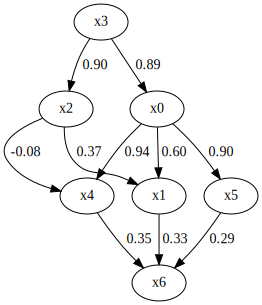

*run
before LinearRegression parent= [0 1 2 3 4 5] , coef= [ 0.0008891   0.32908891 -0.01945124  0.03030099  0.34527709  0.28218827]
simulation LinearRegression parent= [0 1 2 3 4 5] , coef= [ 0.00080335  0.32908891 -0.01000167  0.03030099  0.34527709  0.28218827]
before_after LinearRegression parent= [0 1 2 3 4 5] , coef= [ 0.0008891   0.32908891 -0.01945124  0.03030099  0.34527709  0.28218827]
*run shuffle
before LinearRegression parent= [0 1 2 3 4 5] , coef= [ 0.0008891   0.32908891 -0.01945124  0.03030099  0.34527709  0.28218827]
simulation LinearRegression parent= [0 1 2 3 4 5] , coef= [ 0.00080335  0.32908891 -0.01000167  0.03030099  0.34527709  0.28218827]
before_after LinearRegression parent= [0 1 2 3 4 5] , coef= [ 0.0008891   0.32908891 -0.01945124  0.03030099  0.34527709  0.28218827]
discrete: SHD= 1.0


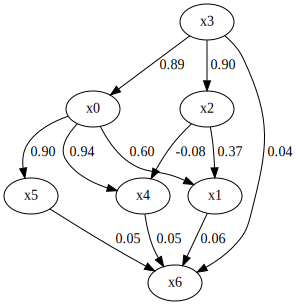

*run
before LogisticRegression parent= [0 1 2 3 4 5] , coef= [[-0.3742733   0.36773284 -0.04240346  0.25884326  0.33095479  0.34103239]]
simulation LogisticRegression parent= [0 1 2 3 4 5] , coef= [[1.42344805 3.67634956 0.35251783 1.4335643  1.78707148 1.53003315]]
before_after LogisticRegression parent= [0 1 2 3 4 5] , coef= [[-0.3742733   0.36773284 -0.04240346  0.25884326  0.33095479  0.34103239]]
*run shuffle
before LogisticRegression parent= [0 1 2 3 4 5] , coef= [[-0.3742733   0.36773284 -0.04240346  0.25884326  0.33095479  0.34103239]]
simulation LogisticRegression parent= [0 1 2 3 4 5] , coef= [[1.42344805 3.67634956 0.35251783 1.4335643  1.78707148 1.53003315]]
before_after LogisticRegression parent= [0 1 2 3 4 5] , coef= [[-0.3742733   0.36773284 -0.04240346  0.25884326  0.33095479  0.34103239]]


In [3]:
# 実験間で共通のデータ

# 誤差項
error = []
for ratio in ratio_list:
    a = np.sqrt(3 * ratio)
    error.append(np.random.uniform(-a, a, size=1000))
error = np.array(error).T

# 機械学習モデル
#param_grid = {"n_estimators": [1, 2, 3]}
param_grid = {"n_estimators": [50, 100, 200]}
ml_models_c = {"lr": LinearRegression(), "rf": GridSearchCV(RandomForestRegressor(), param_grid)}
ml_models_d = {"lr": LogisticRegression(), "rf": GridSearchCV(RandomForestClassifier(), param_grid)}

# 評価関数
eval_funcs_c = {"mse": mean_squared_error}
eval_funcs_d = {"precision": precision_score, "recall": recall_score}

# 離散変数
is_discrete = [False for _ in range(len(causal_graph_true))]
is_discrete[sink_index] = True

# 実験の設定
test_info = []

# 各実験の設定作成

# 実験1: エッジ削除 (x3->x2, x0->x4を削除)
causal_graph = causal_graph_true.copy()
causal_graph[2, 3] = 0
causal_graph[4, 0] = 0

test_info.append({
    "name": "remove",
    "modified_causal_graph": causal_graph,
})

# 実験2: エッジ追加 (x0->x2, x3->x4を追加)
causal_graph = causal_graph_true.copy()
causal_graph[2, 0] = 1
causal_graph[4, 3] = 1

test_info.append({
    "name": "add",
    "modified_causal_graph": causal_graph,
})

# 実験3: エッジ係数値の変更 (x2->x1を10倍に設定)
causal_graph = causal_graph_true.copy()
causal_graph[1, 2] *= 10

test_info.append({
    "name": "modify",
    "modified_causal_graph": causal_graph,
})

# 実験を行っていく
results = {}
for info in test_info:
    print("----", info["name"], "----")
    # sinkが連続
    cdt = CausalDigitalTwin(causal_graph_true, error, data_gen_direct_lingam, sink_index)
    
    # 因果探索結果(連続)
    shd = SHD(causal_graph_true.astype(bool).astype(int), cdt._est_adj.astype(bool).astype(int), double_for_anticausal=False)
    print("continuous: SHD=", shd)
    display(make_dot(cdt._est_adj))
    
    print("*run")
    result = cdt.run(ml_models_c, eval_funcs_c, causal_graph=info["modified_causal_graph"])
    
    # sinkが連続&シャッフル
    print("*run shuffle")
    result_shuffle = cdt.run(ml_models_c, eval_funcs_c, causal_graph=info["modified_causal_graph"], shuffle_residual=True)
    
    # sinkが離散
    def data_gen_direct_lingam_d(causal_graph, error):
        X_d, error_ = data_gen_direct_lingam(causal_graph, error)
        return discretize(X_d, sink_index), error
    cdt = CausalDigitalTwin(causal_graph_true, error, data_gen_direct_lingam_d, sink_index, is_discrete=is_discrete)
    
    # 因果探索結果(離散)
    shd = SHD(causal_graph_true.astype(bool).astype(int), cdt._est_adj.astype(bool).astype(int), double_for_anticausal=False)
    print("discrete: SHD=", shd)
    display(make_dot(cdt._est_adj))
    
    print("*run")
    result_d = cdt.run(ml_models_d, eval_funcs_d, causal_graph=info["modified_causal_graph"])
    
    # sinkが離散&シャッフル
    print("*run shuffle")
    result_d_shuffle = cdt.run(ml_models_d, eval_funcs_d, causal_graph=info["modified_causal_graph"], shuffle_residual=True)
    
    # 値はCausalDigitalTwin.run()の返り値に正解データを足したもの。 
    # 値： evals, predicted_values, simulated, X
    results[info["name"]] = {
        "continuous": result,
        "continuous_shuffle": result_shuffle,
        "discrete": result_d,
        "discrete_shuffle": result_d_shuffle,
    }

## 実験結果

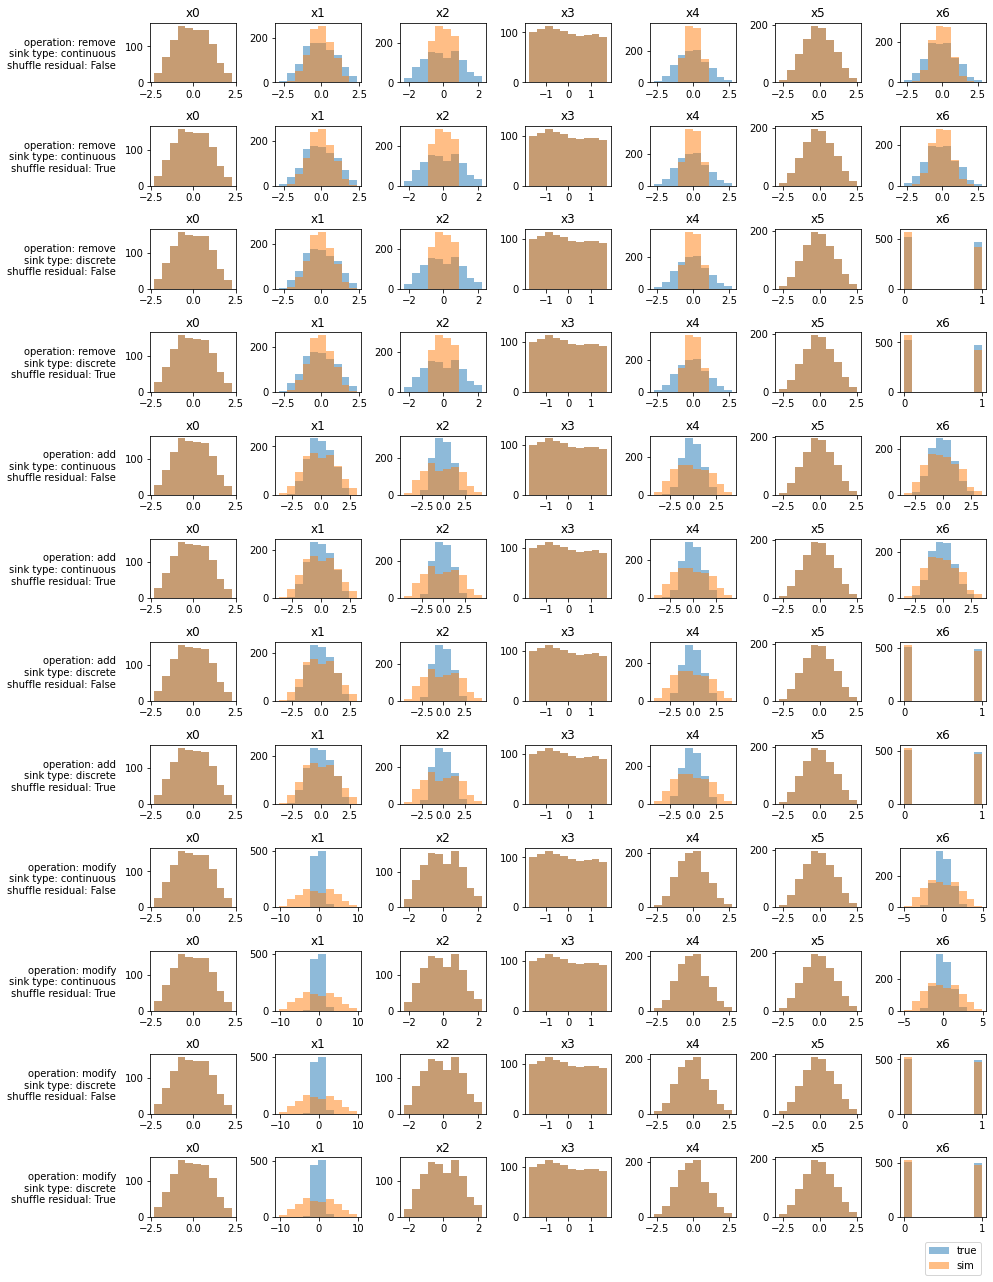

In [4]:
# 環境変化前の真のデータと環境変化後のシミュレーションデータ
n_features = len(causal_graph_true)
n_patterns = len(results) * len(results["add"])
draw_hist(n_features, n_patterns, results)

In [5]:
# シンク変数に対する機械学習モデルの精度
table_c, table_d = make_tables(results)
display(table_c.style.hide(axis="index"))
display(table_d.style.hide(axis="index"))

operation,model,shuffle error,MSE(true),MSE(sim),MSE(est)
remove,LinearRegression,False,0.198,0.199,0.198
remove,RandomForestRegressor,False,0.030,0.030,0.187
remove,LinearRegression,True,0.198,0.738,0.198
remove,RandomForestRegressor,True,0.031,0.816,0.181
add,LinearRegression,False,0.198,0.199,0.198
add,RandomForestRegressor,False,0.033,0.032,0.193
add,LinearRegression,True,0.198,3.317,0.198
add,RandomForestRegressor,True,0.030,3.438,0.196
modify,LinearRegression,False,0.198,0.199,0.199
modify,RandomForestRegressor,False,0.031,0.033,1.043


operation,model,shuffle error,Precision(true),Precision(sim),Precision(est),Recall(true),Recall(sim),Recall(est)
remove,LogisticRegression,False,0.649,0.609,0.607,0.597,0.511,0.517
remove,RandomForestClassifier,False,1.000,0.609,0.580,1.000,0.517,0.557
remove,LogisticRegression,True,0.649,0.493,0.636,0.597,0.422,0.552
remove,RandomForestClassifier,True,1.000,0.494,0.569,1.000,0.428,0.558
add,LogisticRegression,False,0.650,0.739,0.730,0.620,0.680,0.672
add,RandomForestClassifier,False,1.000,0.735,0.684,1.000,0.678,0.609
add,LogisticRegression,True,0.650,0.444,0.694,0.620,0.448,0.700
add,RandomForestClassifier,True,1.000,0.443,0.650,1.000,0.448,0.664
modify,LogisticRegression,False,0.654,0.773,0.775,0.625,0.767,0.769
modify,RandomForestClassifier,False,1.000,0.775,0.639,1.000,0.767,0.643


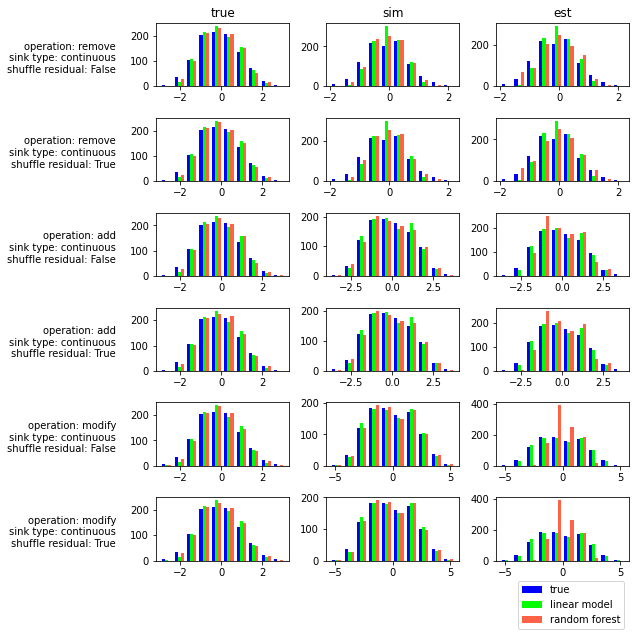

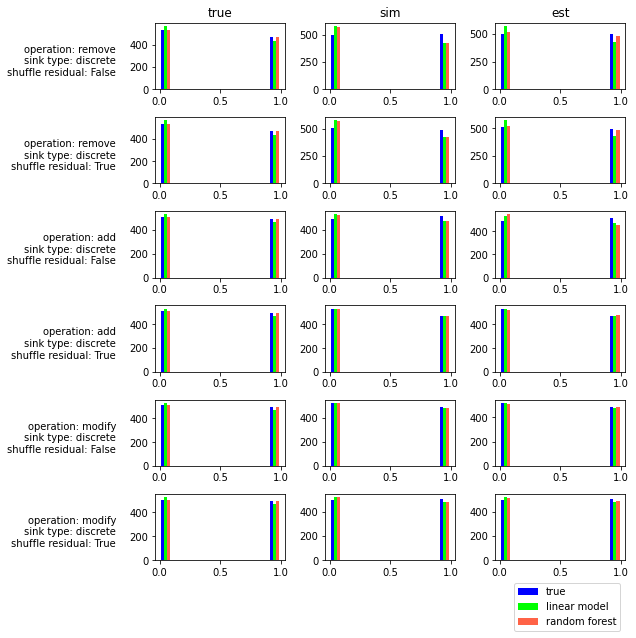

In [6]:
n_patterns = len(results) * len(results["add"])
draw_pred_hist(n_patterns, results, sink_index)

In [7]:
results["add"]["continuous"]["predicted"].keys()

dict_keys([('before', 'lr'), ('before', 'rf'), ('simulation', 'lr'), ('simulation', 'rf'), ('before_after', 'lr'), ('before_after', 'rf')])

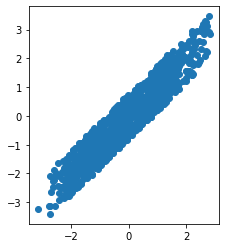

In [8]:
x, e = results["add"]["continuous"]["predicted"][("simulation", "lr")]
#plt.hist((x, e))
plt.scatter(e, x)
plt.gca().set_aspect("equal", "box")

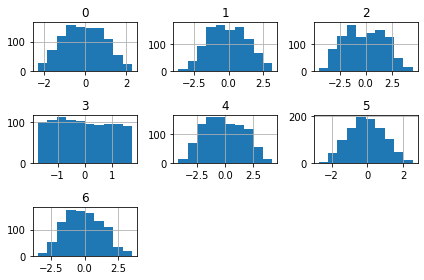

In [9]:
pd.DataFrame(results["add"]["continuous"]["simulated"]).hist()
plt.tight_layout()

In [19]:
x, e = results["add"]["continuous"]["predicted"][("before", "lr")]
np.var(e)

0.7928784082364514

In [21]:
c = np.array([ 0.0008891,0.32908891,-0.01945124,0.03030099,0.34527709,0.28218827])
linear = c @ pd.DataFrame(results["add"]["continuous"]["simulated"].iloc[:, :-1]).T

np.var(linear)

1.595072670816622